In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os, random
from pathlib import Path
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

np.random.seed(0)
sns.set_style("darkgrid")

def my_covar(x, y):
    return my_mean(x * y) - my_mean(x) * my_mean(y)

def my_var(x):
    return np.nansum( (np.array(x) - my_mean(x)) ** 2) / len(x)
    
def my_mean(x):
    return np.nansum(x) / len(x)

def my_corr(x, y):
    numerator = my_covar(x, y)
    denom = np.sqrt(my_var(x)) * np.sqrt(my_var(y))
    return numerator / denom

def custom_r2(true, pred):
    rss = np.nansum((true - pred) ** 2)
    tss = np.nansum((true - my_mean(true)) ** 2)
    return 1 - (rss / tss)

def plot_price_over_time(df, symbol):
    fig, axs = plt.subplots(3, 1, figsize = (15, 9), sharex = True)
    df = df[df["symbol"] == symbol].sort_values(by = ["date"])
    print(list(df))
    axs[0].set_ylabel("Stock Price (USD)")
    axs[0].set_xlabel("Time")
    axs[0].plot(df.date, df.stockPrice, ls = "--", lw = 2, color = "black", alpha = 0.8, label = "Price")
    axs[0].legend()

    axs[1].plot(df.date, df.marketCapitalization)
    print(f"{my_corr(df.stockPrice, df.marketCapitalization) = }")
    plt.show()

    
x = [123, 4, 1, 2 ,4, 2]
y = [1, 2, 3, 4, 5, 6]
x = np.array(x)
y = np.array(y)

print(my_var(x))
print(my_corr(x, y))
print(np.corrcoef(x, y))
print(r2_score(x, y))
print(custom_r2(x, y))
    # corr = covar(x, y) / std(x) * std(y)

2014.5555555555559
-0.6566329458404927
[[ 1.         -0.65663295]
 [-0.65663295  1.        ]]
-0.2337708896365338
-0.2337708896365338


[14.1355238 13.2520542 12.7612371 ... 47.25       1.98       2.1700001]


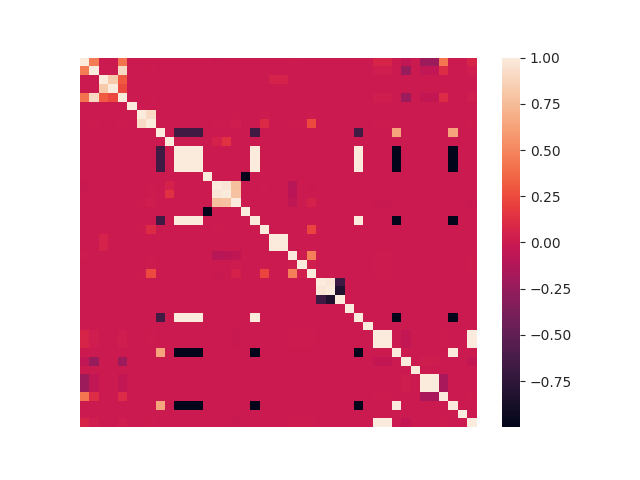

In [13]:
df = pd.read_parquet("/home/lselig/selig-fa/finance/.data/evs_ratios.parquet")
df["year"] = pd.DatetimeIndex(df["date"]).year
# df = df[df.symbol.isin(["AAPL", "GOOGL", "MSFT", "GME", "A", "QQQ", "AMZN", "TSLA"])]
# df = df[df.year != 2022]
df = df[df.stockPrice <=1000 ]
remove_me = []
for col in list(df):
    num_na = df[col].isna().sum().sum()
    if(num_na > 40000):
        remove_me.append(col)

# fig, axs = plt.subplots(2, 1, figsize = (15, 9))
# axs[0].scatter(df.stockPrice, df.marketCapitalization)
%matplotlib widget
# plt.hist(df.stockPrice)
df = df.drop(columns = remove_me)
df = df.dropna()
# plt.scatter(df.stockPrice * df.numberOfShares, df.marketCapitalization)
# plt.show()

# plot_price_over_time(df, "MSFT")

meta_cols = ["year", "symbol", "date", "period"]
meta = df[meta_cols]
labels = df["stockPrice"].values
df = df.drop(columns = ["stockPrice"] + meta_cols)
features = df

corr = features.corr()
sns.heatmap(corr, annot = False, xticklabels=False, yticklabels=False)
plt.show()

In [14]:
for i, feature in enumerate(features):
    print(f"{feature = } -- {np.corrcoef(features[feature].values, labels)[0, 1]:.4f}")

feature = 'numberOfShares' -- -0.0057
feature = 'marketCapitalization' -- -0.0017
feature = 'minusCashAndCashEquivalents' -- -0.0013
feature = 'addTotalDebt' -- 0.0017
feature = 'enterpriseValue' -- -0.0019
feature = 'currentRatio' -- 0.0010
feature = 'quickRatio' -- -0.0011
feature = 'cashRatio' -- -0.0011
feature = 'daysOfSalesOutstanding' -- -0.0015
feature = 'grossProfitMargin' -- 0.0040
feature = 'operatingProfitMargin' -- 0.0006
feature = 'pretaxProfitMargin' -- 0.0005
feature = 'netProfitMargin' -- 0.0005
feature = 'effectiveTaxRate' -- -0.0010
feature = 'returnOnAssets' -- 0.0017
feature = 'returnOnEquity' -- 0.0019
feature = 'returnOnCapitalEmployed' -- 0.0018
feature = 'netIncomePerEBT' -- 0.0010
feature = 'ebitPerRevenue' -- 0.0006
feature = 'debtRatio' -- -0.0008
feature = 'debtEquityRatio' -- -0.0014
feature = 'companyEquityMultiplier' -- -0.0012
feature = 'receivablesTurnover' -- -0.0015
feature = 'fixedAssetTurnover' -- -0.0024
feature = 'assetTurnover' -- 0.0019
feature

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train[:5])
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(y_pred[:5])

my_r2 = r2_score(y_test, y_pred)
print(f"{my_r2 = }")

(182788, 42) (45697, 42) (182788,) (45697,)
[ 8.06      11.835     15.1875    12.        30.9099998]
[36.20611625 36.20786812 36.20390527 36.21409793 36.21217618]
my_r2 = -0.016829201948845407
